### Forecasting using Facebook's Prophet Library

In [6]:
import pandas as pd
import numpy as np
import os
from fbprophet import Prophet


In [7]:
vol_df = pd.read_csv('volume.csv')

In [8]:
m = Prophet()
m.fit(vol_df)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\brett.block\AppData\Local\Continuum\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [9]:
future = m.make_future_dataframe(periods=24, freq='M')
future['ds'] = future['ds'].values.astype('datetime64[M]')

In [11]:
future.head()

,ds
0,2015-01-01
1,2015-02-01
2,2015-03-01
3,2015-04-01
4,2015-05-01


In [12]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
65,2020-05-01,19253.381369,18757.635442,19717.601556
66,2020-06-01,18995.359872,18465.236077,19522.283166
67,2020-07-01,18886.445051,18330.746453,19451.982194
68,2020-08-01,19095.661988,18481.019166,19694.444104
69,2020-09-01,19333.907784,18674.000938,19970.808700


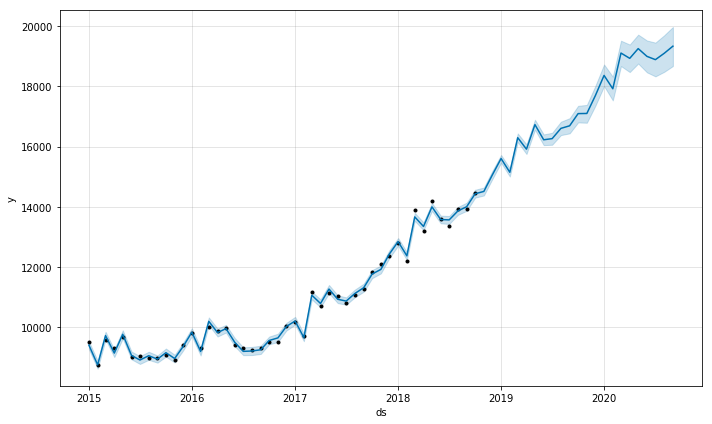

In [13]:
fig1 = m.plot(forecast)

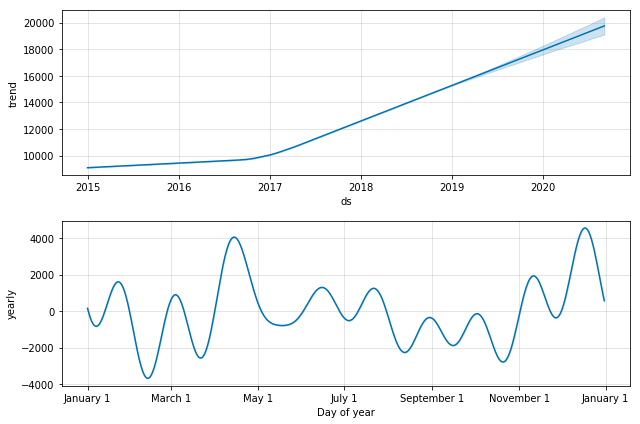

In [14]:
fig2 = m.plot_components(forecast)

In [15]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,9096.511475,9273.869711,9535.417083,9096.511475,9096.511475,313.220259,313.220259,313.220259,313.220259,313.220259,313.220259,0.0,0.0,0.0,9409.731734
1,2015-02-01,9125.807166,8626.376992,8889.971014,9125.807166,9125.807166,-370.671940,-370.671940,-370.671940,-370.671940,-370.671940,-370.671940,0.0,0.0,0.0,8755.135226
2,2015-03-01,9152.267797,9597.864791,9852.174365,9152.267797,9152.267797,572.761549,572.761549,572.761549,572.761549,572.761549,572.761549,0.0,0.0,0.0,9725.029346
3,2015-04-01,9181.563495,9011.936655,9265.732372,9181.563495,9181.563495,-36.029694,-36.029694,-36.029694,-36.029694,-36.029694,-36.029694,0.0,0.0,0.0,9145.533802
4,2015-05-01,9209.914175,9628.325517,9902.412346,9209.914175,9209.914175,558.909811,558.909811,558.909811,558.909811,558.909811,558.909811,0.0,0.0,0.0,9768.823985
